# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [77]:
# Import warnings
import warnings

In [78]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [80]:
# Try loading one file
df = pd.read_parquet("trip_records/2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir("trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        input_df = pd.read_parquet(file_path)
        input_df["pickup_day"] = input_df["tpep_pickup_datetime"].dt.day
        input_df["pickup_day_name"] = input_df["tpep_pickup_datetime"].dt.day_name()
        input_df["pickup_hour"] = input_df["tpep_pickup_datetime"].dt.hour
        input_df["trip_duration"] = ((input_df["tpep_dropoff_datetime"] - input_df["tpep_pickup_datetime"]).dt.total_seconds())/60

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in input_df["pickup_day"].unique():
            # Iterate through each hour of the selected date
            for hour in input_df["pickup_hour"].unique():
                # Sample 5% of the hourly data randomly
                filtered_data = input_df[(input_df["pickup_day"]==date) & (input_df["pickup_hour"]==hour)]
                filtered_data = filtered_data.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, filtered_data])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

os.chdir("..")
df = df.drop(columns=["pickup_day"])

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
df.to_parquet("2023-combined-sampled")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [81]:
# Load the new data file
df = pd.read_parquet("2023-combined-sampled")

In [82]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
3703               41             1  ...        4.12           0.0   
4166              137             1  ...        3.56           0.0   
3847              141             1  ...        3.98           0.0   
1882              107             2  ...        0.00           0.0   
2995366            17             0  ...        8.17           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3703                       1.0         24.72                   2.5   
4166                       1.0         21.36                   2.5   
3847                       1.0         23.88                   2.5   
1882                       1.0         29.70                   2.5   
2995366                    1.0         49.00                   NaN   

         airport_fee  pickup_day_name  pickup_hour  trip_duration Airport_fee  
3703             0.0           Sunday            0      12.450000         NaN  
4166             0.0           Sunday            0      13.366667         NaN  
3847             0.0           Sunday            0       9.250000         NaN  
1882             0.0           Sunday            0      24.900000         NaN  
2995366          NaN           Sunday            0      24.000000         NaN  

[5 rows x 23 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 3703 to 2698522
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [84]:
# Fix the index and drop any columns that are not needed
# STUDENT COMMENT - Dropping column "store_and_fwd_flag" as it's not used anywhere in the assignment
df = df.drop(columns = ["store_and_fwd_flag"])
df.reset_index(inplace = True, drop = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [85]:
# Combine the two airport fee columns
# STUDENT COMMENT - No. of "NaN" values is less in "Airport_fee" column. Hence, filling values from "airport_fee" into "Airport_fee"
df["Airport_fee"] = df["Airport_fee"].fillna(df["airport_fee"])
df = df.drop(columns = ["airport_fee"])

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [86]:
# check where values of fare amount are negative
df[df["fare_amount"] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_day_name, pickup_hour, trip_duration, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [87]:
# Analyse RatecodeID for the negative fare amounts
# STUDENT COMMENT - There are 0 rows where values of fare amount are negative, still writing the command below
df.loc[df["fare_amount"] < 0, ["RatecodeID"]]

Empty DataFrame
Columns: [RatecodeID]
Index: []

In [88]:
# Find which columns have negative values
df[["passenger_count", "trip_distance", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "total_amount", "congestion_surcharge", "trip_duration", "Airport_fee"]].lt(0).sum()

passenger_count            0
trip_distance              0
fare_amount                0
extra                      3
mta_tax                   75
tip_amount                 0
tolls_amount               0
improvement_surcharge     80
total_amount              80
congestion_surcharge      57
trip_duration            118
Airport_fee               15
dtype: int64

In [89]:
# fix these negative values
# STUDENT COMMENT - We have negative values only in financial columns (money related columns) &
#                   trip_duration column. Negative values are invalid for these columns.
#                   We can either drop or treat these values depending on frequency of their occurence.
#                   Since we have less than 100 occurences of negative values per column,
#                   which is very less in comparison to total records (approx 19 lakh), we can drop these rows.

# STUDENT COMMENT - "extra", "mta_tax", "improvement_surcharge", "total_amount", "congestion_surcharge", "Airport_fee" &
#                   "trip_duration" are columns with negative values.
df = df[(df["extra"] >= 0) | df["extra"].isna()]
df = df[(df["mta_tax"] >= 0) | df["mta_tax"].isna()]
df = df[(df["improvement_surcharge"] >= 0) | df["improvement_surcharge"].isna()]
df = df[(df["total_amount"] >= 0) | df["total_amount"].isna()]
df = df[(df["congestion_surcharge"] >= 0) | df["congestion_surcharge"].isna()]
df = df[(df["Airport_fee"] >= 0) | df["Airport_fee"].isna()]
df = df[(df["trip_duration"] >= 0) | df["trip_duration"].isna()]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [90]:
# Find the proportion of missing values in each column
df.isna().mean().round(4)

VendorID                 0.0000
tpep_pickup_datetime     0.0000
tpep_dropoff_datetime    0.0000
passenger_count          0.0342
trip_distance            0.0000
RatecodeID               0.0342
PULocationID             0.0000
DOLocationID             0.0000
payment_type             0.0000
fare_amount              0.0000
extra                    0.0000
mta_tax                  0.0000
tip_amount               0.0000
tolls_amount             0.0000
improvement_surcharge    0.0000
total_amount             0.0000
congestion_surcharge     0.0342
pickup_day_name          0.0000
pickup_hour              0.0000
trip_duration            0.0000
Airport_fee              0.0342
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [91]:
# Display the rows with null values
print("Rows with null values for \"passenger_count\" column")
print(df[df["passenger_count"].isna()][["PULocationID", "DOLocationID", "passenger_count"]])

# Impute NaN values in 'passenger_count'
# STUDENT COMMENT - Both "median" & "mode" of "passenger_count" column is 1, so replacing "NaN" with "mode"
df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].mode()[0])

#STUDENT COMMENT - Handling of 0 values in "passenger_count" column.
#                  The rows having 0 (invalid) passenger_count are less than 2%.
#                  Hence dropping rows with passenger_count 0.
df = df[df["passenger_count"]!=0]

Rows with null values for "passenger_count" column
         PULocationID  DOLocationID  passenger_count
4                 140            17              NaN
6                 213             7              NaN
8                  88           229              NaN
17                 45           188              NaN
26                255           229              NaN
...               ...           ...              ...
1896333            68           170              NaN
1896365           239            50              NaN
1896376           238           238              NaN
1896388           142            48              NaN
1896417            50            68              NaN

[64800 rows x 3 columns]


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [92]:
# Fix missing values in 'RatecodeID'
# STUDENT COMMENT - Both "median" & "mode" of "RatecodeID" column is 1, so replacing "NaN" with "mode"
df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [93]:
# handle null values in congestion_surcharge
# STUDENT COMMENT - Both "median" & "mode" of "congestion_surcharge" column is 2.5, so replacing "NaN" with "mode"
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0])

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [94]:
# Handle any remaining missing values
# STUDENT COMMENT - We have rows with "NaN" value in "Airport_fee" column as well.
#                   Both "median" & "mode" of "Airport_fee" column is 0.00, so replacing "NaN" with "mode"
df["Airport_fee"] = df["Airport_fee"].fillna(df["Airport_fee"].mode()[0])

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

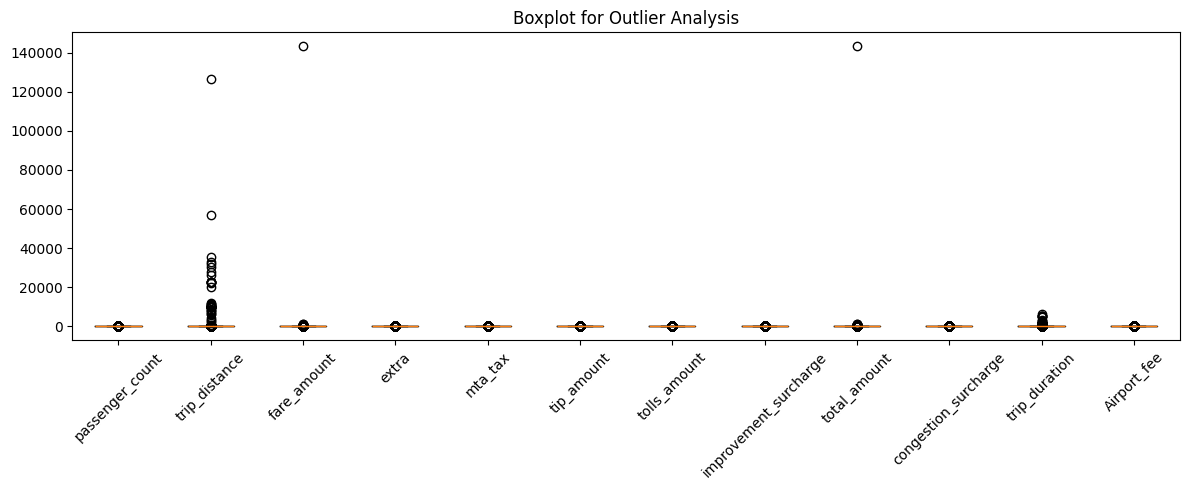

In [95]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# STUDENT COMMENT - Using boxplot to visualize outliers in numeric columns all at once
numeric_columns = ["passenger_count", "trip_distance", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", 
                   "improvement_surcharge", "total_amount", "congestion_surcharge", "trip_duration", "Airport_fee"]

plt.figure(figsize=(12, 5))
plt.boxplot(df[numeric_columns].values, tick_labels=numeric_columns, vert=True)

plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Analysis")
plt.tight_layout()

plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [96]:
# remove passenger_count > 6
df = df[df["passenger_count"]<=6]

In [97]:
# Continue with outlier handling

# STUDENT COMMENT - Section 1.1.1 of this notebook says "Ideally, you can try keeping the total entries to around 250,000 to 300,000."
#                   So, in this cell we'll be dropping outliers instead of treating them, so that we can reduce the number of rows

#STUDENT COMMENT - Dropping rows where either pickup year or dropoff year not equals 2023
df = df[(df["tpep_pickup_datetime"].dt.year == 2023) & (df["tpep_dropoff_datetime"].dt.year == 2023)]

#STUDENT COMMENT - Dropping outliers from "trip_distance" using IQR approach
Q1_trip_distance = df["trip_distance"].quantile(0.25)
Q3_trip_distance = df["trip_distance"].quantile(0.75)
IQR_trip_distance = Q3_trip_distance - Q1_trip_distance

df = (df[(df["trip_distance"] >= (Q1_trip_distance - 1.5 * IQR_trip_distance)) & 
                  (df["trip_distance"] <= (Q3_trip_distance + 1.5 * IQR_trip_distance))].copy())

#STUDENT COMMENT - Dropping outliers from "fare_amount" using IQR approach
Q1_fare_amount = df["fare_amount"].quantile(0.25)
Q3_fare_amount = df["fare_amount"].quantile(0.75)
IQR_fare_amount = Q3_fare_amount - Q1_fare_amount

df = (df[(df["fare_amount"] >= (Q1_fare_amount - 1.5 * IQR_fare_amount)) & 
                  (df["fare_amount"] <= (Q3_fare_amount + 1.5 * IQR_fare_amount))].copy())

#STUDENT COMMENT - Dropping outliers from "total_amount" using IQR approach
Q1_total_amount = df["total_amount"].quantile(0.25)
Q3_total_amount = df["total_amount"].quantile(0.75)
IQR_total_amount = Q3_total_amount - Q1_total_amount

df = (df[(df["total_amount"] >= (Q1_total_amount - 1.5 * IQR_total_amount)) & 
                  (df["total_amount"] <= (Q3_total_amount + 1.5 * IQR_total_amount))].copy())

#STUDENT COMMENT - Dropping outliers from "trip_duration" using IQR approach
Q1_trip_duration = df["trip_duration"].quantile(0.25)
Q3_trip_duration = df["trip_duration"].quantile(0.75)
IQR_trip_duration = Q3_trip_duration - Q1_trip_duration

df = (df[(df["trip_duration"] >= (Q1_trip_duration - 1.5 * IQR_trip_duration)) & 
                  (df["trip_duration"] <= (Q3_trip_duration + 1.5 * IQR_trip_duration))].copy())

#STUDENT COMMENT - Dropping rows where "payment_type" is 0 as valid values are from 1 to 6 according to data dictionary
df = df[(df["payment_type"] >= 1) & (df["payment_type"] <= 6)]

In [98]:
# Do any columns need standardising?

#STUDENT COMMENT - At the moment standardising is not required. Will perform in coming cells if there is a requirement

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [99]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_day_name',
 'pickup_hour',
 'trip_duration',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:              Categorical
* `tpep_pickup_datetime`:  Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`:       Numerical
* `trip_distance`:         Numerical
* `RatecodeID`:            Categorical
* `PULocationID`:          Categorical
* `DOLocationID`:          Categorical
* `payment_type`:          Categorical
* `pickup_hour`:           Numerical
* `trip_duration`:         Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`:           Numerical
* `extra`:                 Numerical
* `mta_tax`:               Numerical
* `tip_amount`:            Numerical
* `tolls_amount`:          Numerical
* `improvement_surcharge`: Numerical
* `total_amount`:          Numerical
* `congestion_surcharge`:  Numerical
* `airport_fee`:           Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<function matplotlib.pyplot.show(close=None, block=None)>

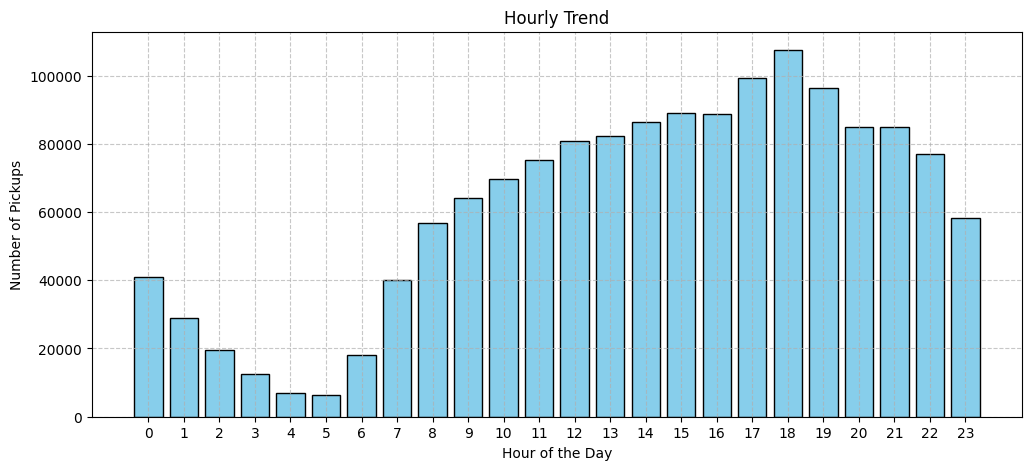

In [100]:
# Find and show the hourly trends in taxi pickups

# STUDENT COMMENT - Calculating pickup count for every hour
hourly_trends = df["pickup_hour"].value_counts().reset_index(name = "pickup_count")
hourly_trends.sort_values(by="pickup_hour", inplace=True, ascending=True)
hourly_trends.reset_index(inplace=True, drop=True)

# STUDENT COMMENT - Visualizing hourly trends in taxi pickups using bar plot
plt.figure(figsize=(12,5))
plt.bar(hourly_trends["pickup_hour"], hourly_trends["pickup_count"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trend")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show

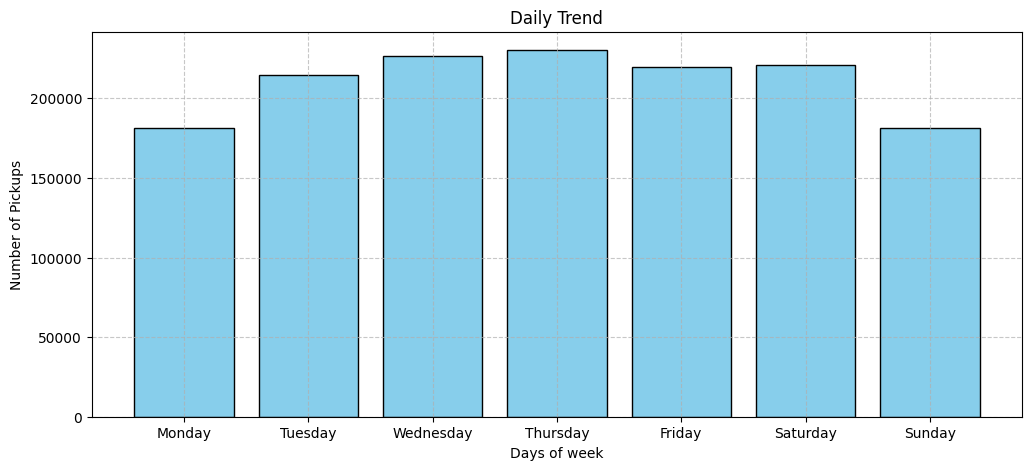

In [101]:
# Find and show the daily trends in taxi pickups (days of the week)

# STUDENT COMMENT - Calculating pickup count for every day of week
daily_trends = df["tpep_pickup_datetime"].dt.dayofweek.value_counts().rename_axis("day_of_week").reset_index(name="pickup_count")
daily_trends.sort_values(by="day_of_week", inplace=True, ascending=True)
daily_trends.reset_index(inplace=True, drop=True)

# STUDENT COMMENT - Visualizing daily trends in taxi pickups (days of the week) using bar plot
plt.figure(figsize=(12,5))
plt.bar(daily_trends["day_of_week"], daily_trends["pickup_count"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Days of week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trend")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

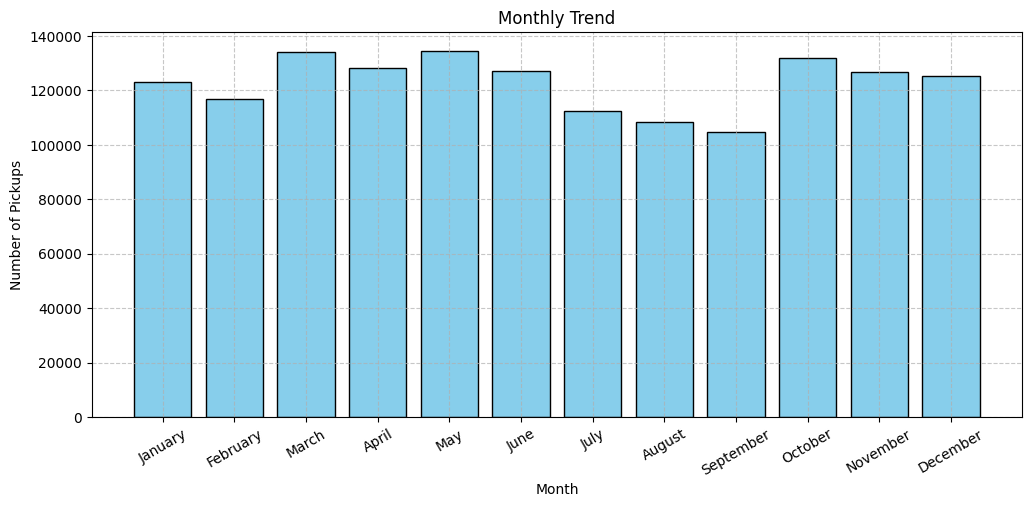

In [102]:
# Show the monthly trends in pickups

# STUDENT COMMENT - Calculating pickup count for every month
monthly_trends = df["tpep_pickup_datetime"].dt.month.value_counts().rename_axis("month").reset_index(name="pickup_count")
monthly_trends.sort_values(by="month", inplace=True, ascending=True)
monthly_trends.reset_index(inplace=True, drop=True)

# STUDENT COMMENT - Visualizing monthly trends in taxi pickups using bar plot
plt.figure(figsize=(12,5))
plt.bar(monthly_trends["month"], monthly_trends["pickup_count"], color="skyblue", edgecolor="black")
plt.xticks(ticks=monthly_trends["month"], labels=["January", "February", "March", "April", "May", "June", "July", 
                                                  "August", "September", "October", "November", "December"], rotation = 30)
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trend")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [103]:
# Analyse the above parameters
df[["fare_amount", "tip_amount", "total_amount", "trip_distance"]].describe()

fare_amount    tip_amount  total_amount  trip_distance
count  1.474069e+06  1.474069e+06  1.474069e+06   1.474069e+06
mean   1.289491e+01  2.556359e+00  2.016842e+01   1.799862e+00
std    5.641651e+00  1.882018e+00  6.765028e+00   1.177656e+00
min    0.000000e+00  0.000000e+00  1.000000e+00   0.000000e+00
25%    8.600000e+00  1.000000e+00  1.510000e+01   9.600000e-01
50%    1.210000e+01  2.650000e+00  1.896000e+01   1.500000e+00
75%    1.630000e+01  3.780000e+00  2.436000e+01   2.330000e+00
max    3.130000e+01  3.550000e+01  4.012000e+01   6.950000e+00

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [104]:
# Create a df with non zero entries for the selected parameters.
finance_df = df[(df["fare_amount"] != 0) & (df["tip_amount"] != 0) & (df["total_amount"] != 0)].copy()
finance_df = finance_df[(finance_df["trip_distance"]!=0) | ((finance_df["trip_distance"]==0) & 
                                                            (finance_df["PULocationID"]==finance_df["DOLocationID"]))].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

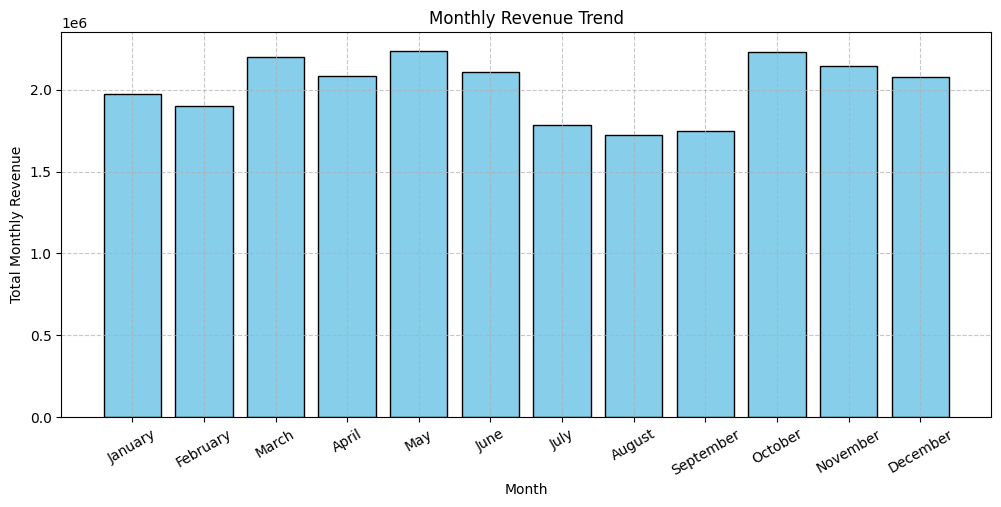

In [105]:
# Group data by month and analyse monthly revenue

# STUDENT COMMENT - Calculating total revenue for every month
monthly_revenue = finance_df.groupby(finance_df["tpep_pickup_datetime"].dt.month)["total_amount"].sum().reset_index()
monthly_revenue.columns = ["month", "total_monthly_revenue"]

# STUDENT COMMENT - Visualizing total revenue for every month using bar plot
plt.figure(figsize=(12,5))
plt.bar(monthly_revenue["month"], monthly_revenue["total_monthly_revenue"], color="skyblue", edgecolor="black")
plt.xticks(ticks=monthly_revenue["month"], labels=["January", "February", "March", "April", "May", "June", "July", 
                                                   "August", "September", "October", "November", "December"], rotation = 30)
plt.xlabel("Month")
plt.ylabel("Total Monthly Revenue")
plt.title("Monthly Revenue Trend")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

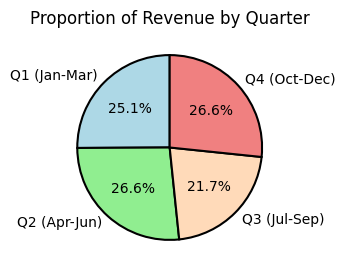

In [106]:
# Calculate proportion of each quarter

# STUDENT COMMENT - Calculating total revenue for every month
quarterly_revenue = finance_df.groupby(finance_df["tpep_pickup_datetime"].dt.quarter)["total_amount"].sum().reset_index(name="total_revenue")
quarterly_revenue.rename(columns={"tpep_pickup_datetime": "quarter"}, inplace=True)

# STUDENT COMMENT - Visualizing total revenue for every quarter using pie chart
#                   Using pie chart as we have to visualize proportions, otherwise we could have used bar plot
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(
    quarterly_revenue["total_revenue"], 
    labels=["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"], 
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightblue", "lightgreen", "peachpuff", "lightcoral"],
    wedgeprops={"edgecolor": "black", "linewidth": 1.5}
)
ax.set_aspect("equal")
plt.title("Proportion of Revenue by Quarter")

plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

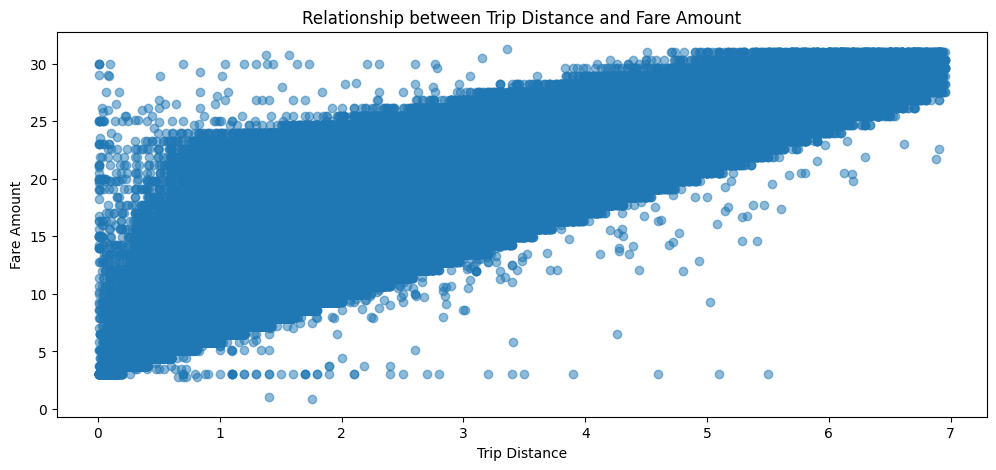


Correlation between fare_amount & trip_distance: 0.8833864530661603



In [107]:
# Show how trip fare is affected by distance
trip_dist_vs_fare_amount_df = finance_df[finance_df["trip_distance"] != 0].copy()

# STUDENT COMMENT - Plotting variation of trip distance & fare amount using scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(trip_dist_vs_fare_amount_df["trip_distance"], trip_dist_vs_fare_amount_df["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Relationship between Trip Distance and Fare Amount")

plt.show()

# Correlation
correlation = trip_dist_vs_fare_amount_df["trip_distance"].corr(trip_dist_vs_fare_amount_df["fare_amount"])
print(f"\nCorrelation between fare_amount & trip_distance: {correlation}\n")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [108]:
# Show relationship between fare and trip duration
correlation = finance_df["trip_duration"].corr(finance_df["fare_amount"])
print(f"\nCorrelation between fare_amount & trip_duration: {correlation}\n")

# STUDENT COMMENT - Plotting variation of trip duration & fare amount using scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(finance_df["trip_duration"], finance_df["fare_amount"], alpha=0.5)
plt.xlabel("Trip Duration")
plt.ylabel("Fare Amount")
plt.title("Relationship between Trip Duration and Fare Amount")

plt.show()


Correlation between fare_amount & trip_duration: 0.9302996947916536



In [109]:
# Show relationship between fare and number of passengers
correlation = finance_df["passenger_count"].corr(finance_df["fare_amount"])
print(f"\nCorrelation between fare_amount & passenger_count: {correlation}\n")

# STUDENT COMMENT - Plotting variation of number of passengers & fare amount using scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(finance_df["passenger_count"], finance_df["fare_amount"], alpha=0.5)
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.title("Relationship between Passenger Count and Fare Amount")

plt.show()


Correlation between fare_amount & passenger_count: 0.017681814246287685




Correlation between tip_amount & trip_distance: 0.5268455358351877



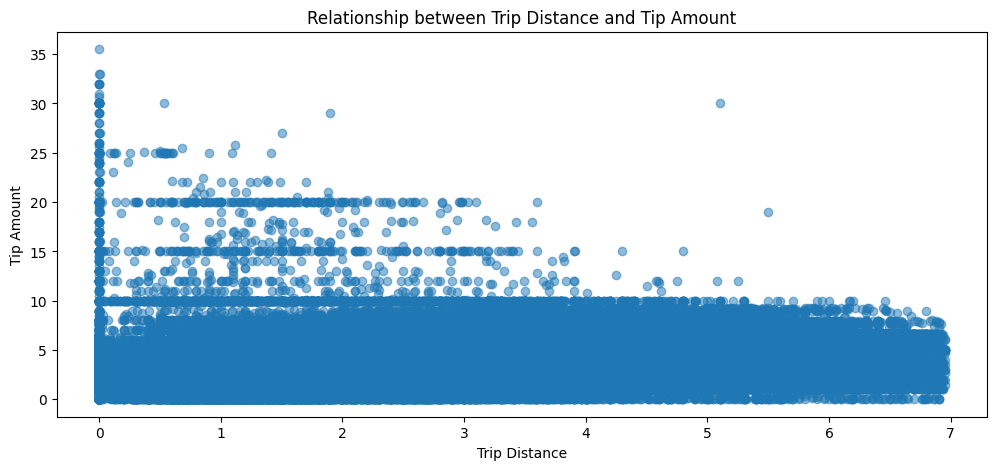

In [110]:
# Show relationship between tip and trip distance
correlation = finance_df["trip_distance"].corr(finance_df["tip_amount"])
print(f"\nCorrelation between tip_amount & trip_distance: {correlation}\n")

# STUDENT COMMENT - Plotting variation of trip distance & tip amount using scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(finance_df["trip_distance"], finance_df["tip_amount"], alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.title("Relationship between Trip Distance and Tip Amount")

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

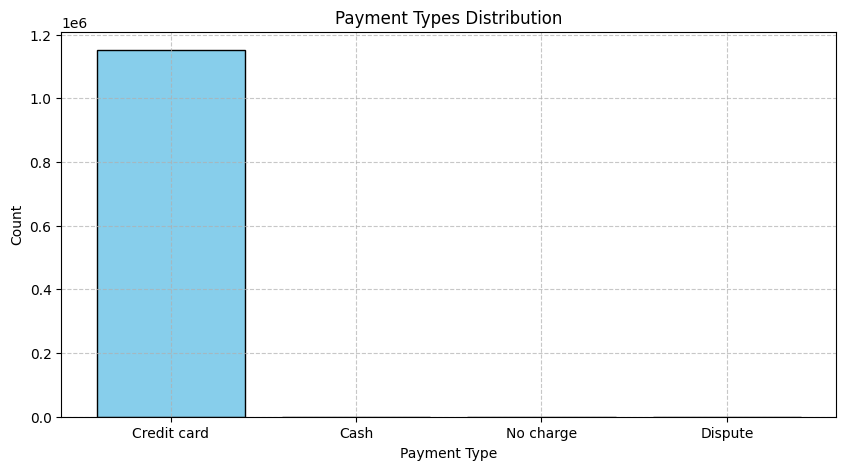

In [111]:
# Analyse the distribution of different payment types (payment_type).

# STUDENT COMMENT - Calculating the count/occurence of different payment types in the records
payment_type_count = finance_df["payment_type"].value_counts().reset_index(name="total_count").sort_values(by="payment_type")
payment_type_count.reset_index(inplace=True, drop=True)

# STUDENT COMMENT - This will be used to get the correct payment type name on X-axis (xticks)
#
#        **NOTE** - Only those payment types will be visible on x-axis where the count is more than 0
payment_type_map = {1: "Credit card", 2: "Cash", 3: "No charge", 4: "Dispute", 5: "Unknown", 6: "Voided trip"}
payment_type_count["payment_type_name"] = payment_type_count["payment_type"].map(payment_type_map)
payment_type_count = payment_type_count.dropna(subset=["payment_type_name"])

# STUDENT COMMENT - Plotting different payment types & count of their occurence using bar plot
plt.figure(figsize=(10,5))
plt.bar(payment_type_count["payment_type_name"], payment_type_count["total_count"], color="skyblue", edgecolor="black")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Payment Types Distribution")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [136]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [112]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

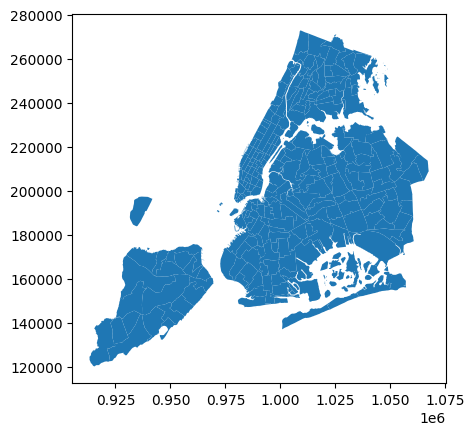

In [113]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [114]:
# Merge zones and trip records using locationID and PULocationID
finance_df = finance_df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [115]:
# Group data by location and calculate the number of trips
trip_count_per_location = finance_df.groupby("LocationID")["LocationID"].count().reset_index(name="trip_count")

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [116]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_count_per_location, on = "LocationID", how="left")

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<function matplotlib.pyplot.show(close=None, block=None)>

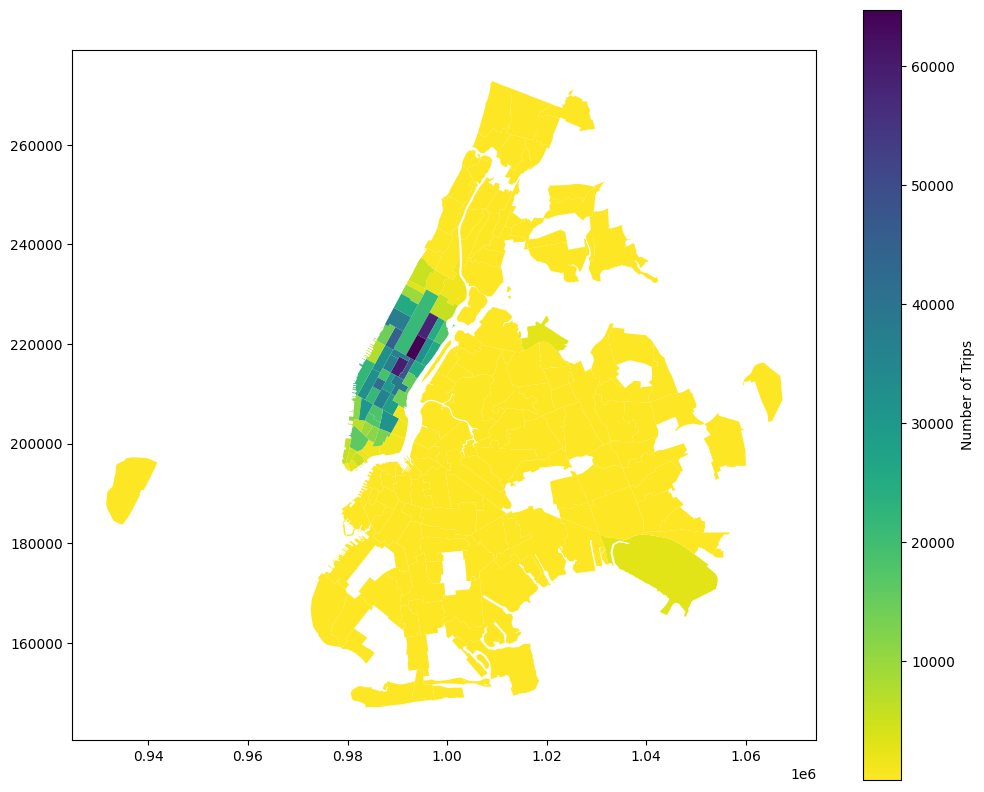

In [117]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column = "trip_count", ax = ax, legend=True, legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"}, cmap="viridis_r")

plt.show

In [118]:
# can you try displaying the zones DF sorted by the number of trips?
# STUDENT COMMENT - Not sure if the expectation is to get a sorted df or a color-coded map of the sorted df
#                   Creating a sorted (descending) map, color-coded map can be plotted in the same way as done in previous cell
zones_sorted_by_trips = zones.sort_values(by="trip_count", ascending=False).reset_index(drop=True)
zones_sorted_by_trips

OBJECTID  Shape_Leng  Shape_Area                           zone  \
0         237    0.042213    0.000096          Upper East Side South   
1         161    0.035804    0.000072                 Midtown Center   
2         236    0.044252    0.000103          Upper East Side North   
3         162    0.035270    0.000048                   Midtown East   
4         142    0.038176    0.000076            Lincoln Square East   
..        ...         ...         ...                            ...   
258       250    0.079626    0.000241  Westchester Village/Unionport   
259       251    0.137711    0.000626                    Westerleigh   
260       252    0.158004    0.001025                     Whitestone   
261       253    0.036051    0.000078                  Willets Point   
262       254    0.085886    0.000360       Williamsbridge/Olinville   

     LocationID        borough  \
0           237      Manhattan   
1           161      Manhattan   
2           236      Manhattan   
3           162      Manhattan   
4           142      Manhattan   
..          ...            ...   
258         250          Bronx   
259         251  Staten Island   
260         252         Queens   
261         253         Queens   
262         254          Bronx   

                                              geometry  trip_count  
0    POLYGON ((993633.442 216961.016, 993507.232 21...     64713.0  
1    POLYGON ((991081.026 214453.698, 990952.644 21...     59693.0  
2    POLYGON ((995940.048 221122.92, 995812.322 220...     58278.0  
3    POLYGON ((992224.354 214415.293, 992096.999 21...     46931.0  
4    POLYGON ((989380.305 218980.247, 989359.803 21...     44875.0  
..                                                 ...         ...  
258  POLYGON ((1026991.885 245048.502, 1027255.054 ...         NaN  
259  POLYGON ((947868.004 169247.734, 948000.981 16...         NaN  
260  POLYGON ((1033946.683 231157.996, 1033973.166 ...         NaN  
261  POLYGON ((1028825.348 218121.42, 1029152.461 2...         NaN  
262  POLYGON ((1025214.477 259577.301, 1025348.099 ...         NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [119]:
# Find routes which have the slowest speeds at different times of the day

# STUDENT COMMENT - Creating new DF from "finance_df" & dropping all unnecessary columns from new DF
operational_efficiency_df = finance_df.copy()
operational_efficiency_df.drop(columns=["OBJECTID", "Shape_Leng", "Shape_Area", "LocationID", "borough", "geometry"], inplace=True)

# STUDENT COMMENT - Calculating average trip duration for every combination of PULocationID, DOLocationID, pickup_hour
avg_duration_df = (operational_efficiency_df.groupby(["PULocationID", "DOLocationID", "pickup_hour"])["trip_duration"]
                   .mean().reset_index(name="avg_trip_duration"))

# STUDENT COMMENT - Merging operational_efficiency_df & avg_duration_df to get the "avg_trip_duration" column in operational_efficiency_df
operational_efficiency_df = operational_efficiency_df.merge(avg_duration_df, on=["PULocationID", "DOLocationID", "pickup_hour"], how="left")

# STUDENT COMMENT - Calculating speed by dividing "trip_distance" by "avg_trip_duration"
operational_efficiency_df["speed"] = operational_efficiency_df["trip_distance"]/operational_efficiency_df["avg_trip_duration"]

# STUDENT COMMENT - Calculating minimum speed for every hour
hourly_min_speed_df = operational_efficiency_df.groupby(["pickup_hour"])["speed"].min().reset_index(name="min_speed")

# STUDENT COMMENT - Merging operational_efficiency_df & hourly_min_speed_df to get min speed for every hour in operational_efficiency_df
operational_efficiency_df = operational_efficiency_df.merge(hourly_min_speed_df, on="pickup_hour", how="left")

# STUDENT COMMENT - Filtering slowest routes for every hour by selecting rows where "speed" is equal to "min_speed" for that hour
slowest_speed_routes = operational_efficiency_df[operational_efficiency_df["speed"]==operational_efficiency_df["min_speed"]]
(slowest_speed_routes.groupby(by="pickup_hour").first())[["zone", "speed", "min_speed"]]

zone  speed  min_speed
pickup_hour                                                 
0                              Murray Hill    0.0        0.0
1                 Financial District South    0.0        0.0
2                           Yorkville East    0.0        0.0
3                                 Union Sq    0.0        0.0
4            Meatpacking/West Village West    0.0        0.0
5                         Prospect Heights    0.0        0.0
6                                  Erasmus    0.0        0.0
7                    Upper West Side North    0.0        0.0
8                            Midtown North    0.0        0.0
9                  Two Bridges/Seward Park    0.0        0.0
10                 Queensbridge/Ravenswood    0.0        0.0
11                            Midtown East    0.0        0.0
12                 Queensbridge/Ravenswood    0.0        0.0
13                    TriBeCa/Civic Center    0.0        0.0
14                 Queensbridge/Ravenswood    0.0        0.0
15                          Midtown Center    0.0        0.0
16                        Garment District    0.0        0.0
17                   Upper East Side South    0.0        0.0
18                     Lincoln Square West    0.0        0.0
19                   Upper West Side North    0.0        0.0
20                     Lincoln Square East    0.0        0.0
21                      World Trade Center    0.0        0.0
22                 Queensbridge/Ravenswood    0.0        0.0
23                           Midtown North    0.0        0.0

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.


Busiest Hour::18
Total Trips for Busiest Hour::86694



<function matplotlib.pyplot.show(close=None, block=None)>

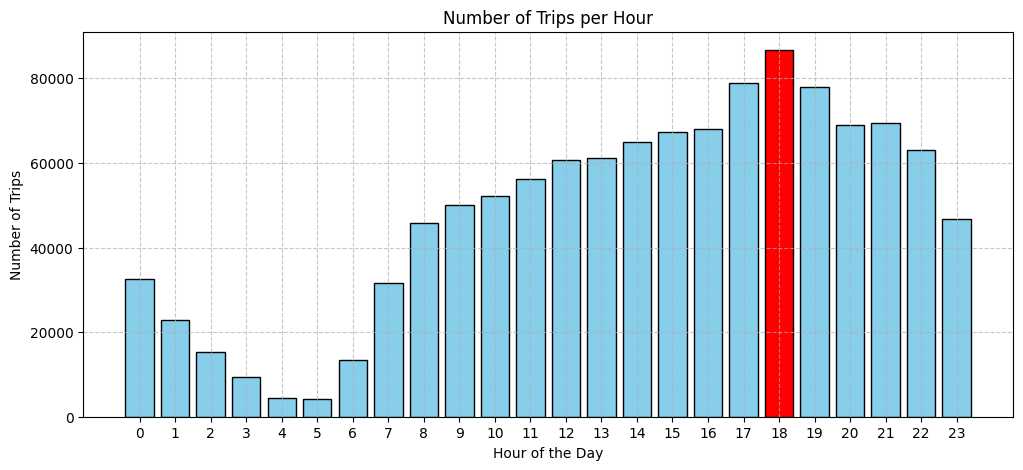

In [120]:
# Visualise the number of trips per hour and find the busiest hour

# STUDENT COMMENT - Calculating number of trips per hour
hourly_trips = operational_efficiency_df.groupby("pickup_hour")["trip_duration"].count().reset_index(name="trip_count")

# STUDENT COMMENT - Fetching the busiest hour (hour with highest number of trips)
busiest_hour = hourly_trips.loc[hourly_trips["trip_count"].idxmax()]
print(f"\nBusiest Hour::{busiest_hour["pickup_hour"]}\nTotal Trips for Busiest Hour::{busiest_hour["trip_count"]}\n")

# STUDENT COMMENT - Setting red color for busiest hour & blue for others
colors = ["skyblue" if hour != busiest_hour["pickup_hour"] else "red" for hour in hourly_trips["pickup_hour"]]

# STUDENT COMMENT - Plotting trip count for different hours of the day using bar plot
plt.figure(figsize=(12,5))
bars = plt.bar(hourly_trips["pickup_hour"], hourly_trips["trip_count"], color=colors, edgecolor="black")
plt.xticks(ticks=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [121]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 20     # STUDENT COMMENT - As per sampling done in 1.1.1 segment, the sample fraction should be 20 to scale up
hourly_trips["scaled_trip_count"] = hourly_trips["trip_count"] * sample_fraction

hourly_trips.sort_values(by="scaled_trip_count", ascending=False, inplace=True)

print("\nActual number of trips for 5 busiest hours\n")
hourly_trips[["pickup_hour", "scaled_trip_count"]].head(5)


Actual number of trips for 5 busiest hours



pickup_hour  scaled_trip_count
18           18            1733880
17           17            1577820
19           19            1561480
21           21            1386820
20           20            1379760

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

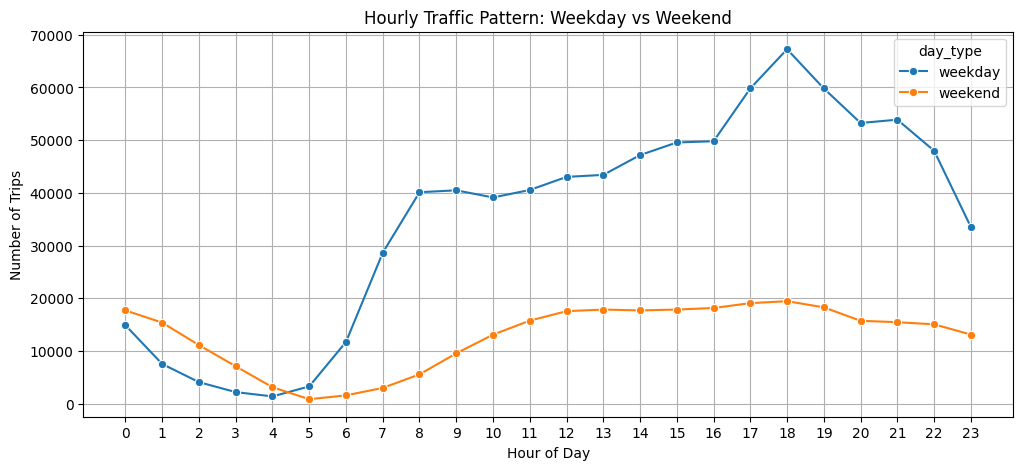

In [122]:
# Compare traffic trends for the week days and weekends
# STUDENT COMMENT - Adding column "day_type" in operational_efficiency_df to identify if it's a weekday or weekend
operational_efficiency_df["day_type"] = (operational_efficiency_df["pickup_day_name"]
                                         .apply(lambda x: "weekend" if x in ("Saturday", "Sunday") else "weekday"))

# STUDENT COMMENT - Calculating hourly traffic for weekdays & weekends
day_type_hourly_traffic_df = (operational_efficiency_df.groupby(by=["pickup_hour", "day_type"])["trip_duration"]
                              .count().reset_index(name="trip_count"))

# STUDENT COMMENT - Using line plot so we can easily see the hourly traffic trend on weekdays & weekends
plt.figure(figsize=(12,5))
sns.lineplot(data=day_type_hourly_traffic_df, x="pickup_hour", y="trip_count", hue="day_type", marker="o")
plt.title("Hourly Traffic Pattern: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(True)

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [123]:
# Find top 10 pickup and dropoff zones
# STUDENT COMMENT - Calculating hourly pickup count for every PULocationID
zonal_hourly_pickups = (operational_efficiency_df.groupby(by=["PULocationID", "pickup_hour"])["trip_duration"]
                        .count().reset_index(name="trip_count"))

# STUDENT COMMENT - Sorting zonal_hourly_pickups in descending order & then printing top 10 hourly pickup zones
top_zonal_hourly_pickups = zonal_hourly_pickups.sort_values(by="trip_count", ascending=False)
print("\n Top 10 pickup zones")
print(top_zonal_hourly_pickups.head(10))

# STUDENT COMMENT - Adding "dropoff_hour" column to operational_efficiency_df using "tpep_dropoff_datetime"
operational_efficiency_df["dropoff_hour"] = operational_efficiency_df["tpep_dropoff_datetime"].dt.hour

# STUDENT COMMENT - Calculating hourly dropoff count for every DOLocationID
zonal_hourly_dropoffs = (operational_efficiency_df.groupby(by=["DOLocationID", "dropoff_hour"])["trip_duration"]
                         .count().reset_index(name="trip_count"))

# STUDENT COMMENT - Sorting zonal_hourly_dropoffs in descending order & then printing top 10 hourly dropoff zones
top_zonal_hourly_dropoffs = zonal_hourly_dropoffs.sort_values(by="trip_count", ascending=False)
print("\n Top 10 dropoff zones")
print(top_zonal_hourly_dropoffs.head(10))


 Top 10 pickup zones
      PULocationID  pickup_hour  trip_count
1446           161           18        5543
1445           161           17        5181
2149           237           18        4994
1447           161           19        4927
2148           237           17        4910
2145           237           14        4805
2122           236           15        4788
2146           237           15        4785
2147           237           16        4595
1444           161           16        4495

 Top 10 dropoff zones
      DOLocationID  dropoff_hour  trip_count
3022           237            18        4925
2998           236            18        4763
2995           236            15        4630
2997           236            17        4441
3016           237            12        4431
3019           237            15        4369
2994           236            14        4298
2996           236            16        4255
3021           237            17        4174
3018           237   

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

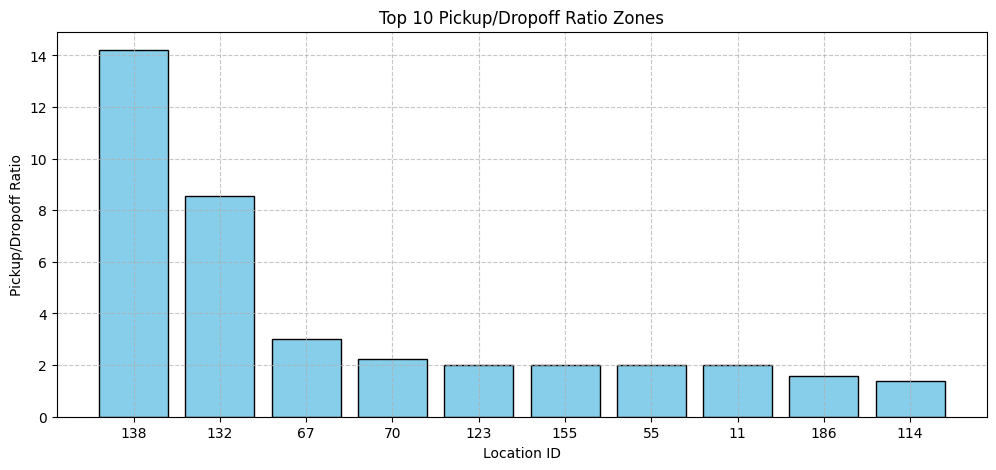

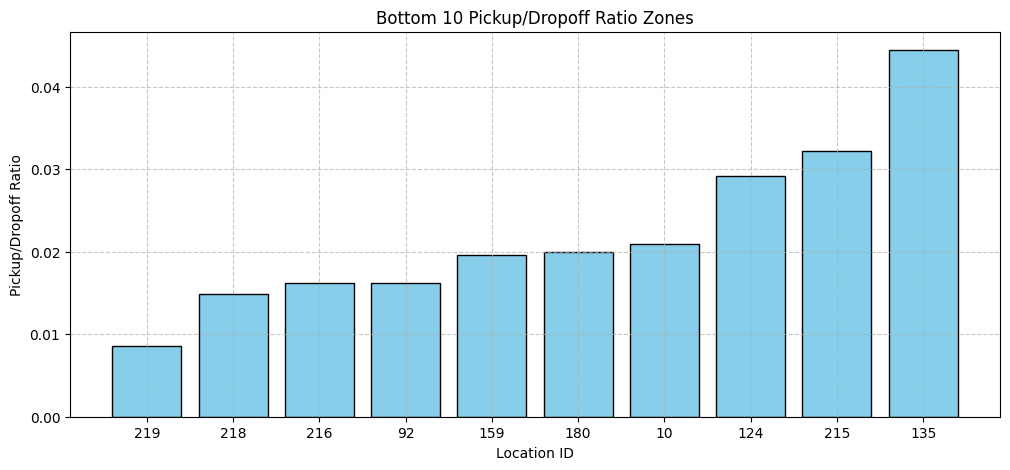

In [124]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# STUDENT COMMENT - Calculating total pickups & dropoffs for every PULocationID & DOLocationID respectively.
total_pickups_per_zone = operational_efficiency_df.groupby("PULocationID")["trip_duration"].count().reset_index(name="pickup_count")
total_dropoffs_per_zone = operational_efficiency_df.groupby("DOLocationID")["trip_duration"].count().reset_index(name="dropoff_count")

# STUDENT COMMENT - Merging total_pickups_per_zone & total_dropoffs_per_zone to have the pickup & dropoff data combined
#                   We are using inner join because we want rows with both pickups & dropoffs, both are required to calculate ratio
pickup_dropoff_per_zone = total_pickups_per_zone.merge(total_dropoffs_per_zone, left_on="PULocationID", right_on="DOLocationID", how="inner")

# STUDENT COMMENT - Calculating ratio of pickups & dropoffs for every zone
pickup_dropoff_per_zone["pickup_dropoff_ratio"] = pickup_dropoff_per_zone["pickup_count"] / pickup_dropoff_per_zone["dropoff_count"]
pickup_dropoff_per_zone.drop(columns="DOLocationID", inplace=True)
pickup_dropoff_per_zone.rename(columns={"PULocationID":"LocationID"}, inplace=True)

# STUDENT COMMENT - Fetching Top 10 & Bottom 10 ratios
top_10_ratio = pickup_dropoff_per_zone.sort_values(by="pickup_dropoff_ratio", ascending=False).head(10)
top_10_ratio["LocationID"] = top_10_ratio["LocationID"].astype(str)
bottom_10_ratio = pickup_dropoff_per_zone.sort_values(by="pickup_dropoff_ratio", ascending=True).head(10)
bottom_10_ratio["LocationID"] = bottom_10_ratio["LocationID"].astype(str)

# STUDENT COMMENT - Plotting bar chart to visualize Top 10 pickup/dropoff ratios
plt.figure(figsize=(12,5))
plt.bar(top_10_ratio["LocationID"], top_10_ratio["pickup_dropoff_ratio"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Pickup/Dropoff Ratio Zones")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# STUDENT COMMENT - Plotting bar chart to visualize Bottom 10 pickup/dropoff ratios
plt.figure(figsize=(12,5))
plt.bar(bottom_10_ratio["LocationID"], bottom_10_ratio["pickup_dropoff_ratio"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Pickup/Dropoff Ratio Zones")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

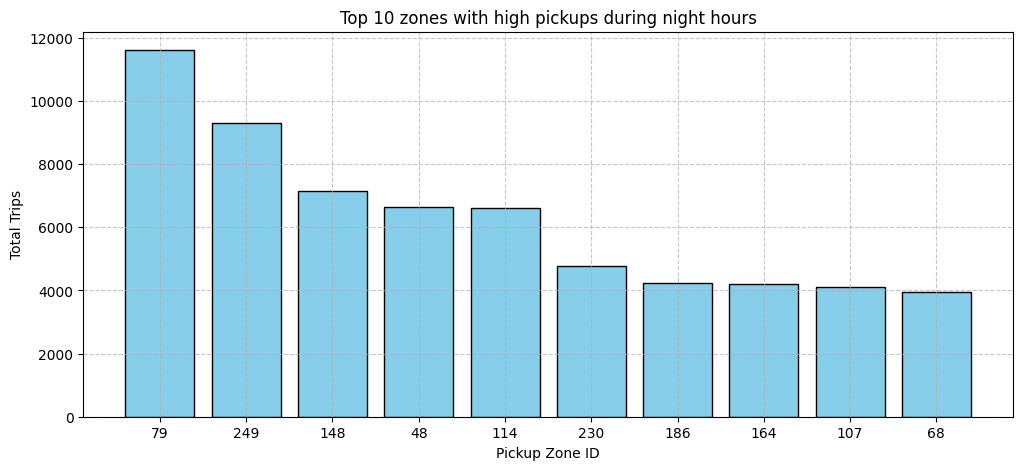

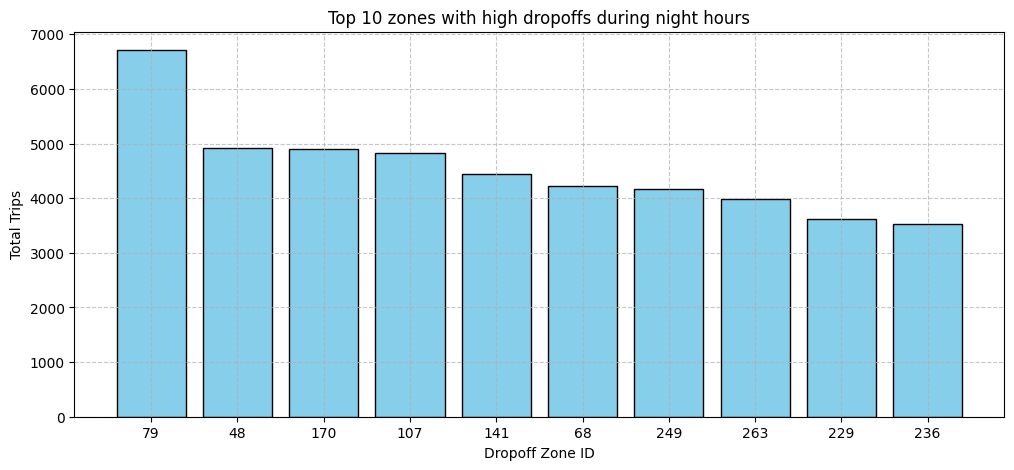

In [125]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# STUDENT COMMENT - Creating 2 DFs, one for pickups during night hours & other for dropoffs during night hours
night_hours_pickup_df = operational_efficiency_df[(operational_efficiency_df["tpep_pickup_datetime"].dt.time >= pd.to_datetime("23:00").time()) |
                                            (operational_efficiency_df["tpep_pickup_datetime"].dt.time < pd.to_datetime("05:00").time())]
night_hours_dropoff_df = operational_efficiency_df[(operational_efficiency_df["tpep_dropoff_datetime"].dt.time >= pd.to_datetime("23:00").time()) |
                                            (operational_efficiency_df["tpep_dropoff_datetime"].dt.time < pd.to_datetime("05:00").time())]

# STUDENT COMMENT - Creating DF for pickups for every zone during night hours
zonal_night_hours_pickups = night_hours_pickup_df.groupby(by=["PULocationID"])["trip_duration"].count().reset_index(name="trip_count")

# STUDENT COMMENT - Sorting zonal_night_time_pickups in descending order
top_zonal_night_hours_pickups = zonal_night_hours_pickups.sort_values(by="trip_count", ascending=False).head(10)
top_zonal_night_hours_pickups["PULocationID"] = top_zonal_night_hours_pickups["PULocationID"].astype(str)

# STUDENT COMMENT - Plotting bar chart to visualize Top 10 zones with high pickups during night hours
plt.figure(figsize=(12,5))
plt.bar(top_zonal_night_hours_pickups["PULocationID"], top_zonal_night_hours_pickups["trip_count"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Pickup Zone ID")
plt.ylabel("Total Trips")
plt.title("Top 10 zones with high pickups during night hours")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# STUDENT COMMENT - Creating DF for dropoffs for every zone during night hours
zonal_night_hours_dropoffs = night_hours_dropoff_df.groupby(by=["DOLocationID"])["trip_duration"].count().reset_index(name="trip_count")

# STUDENT COMMENT - Sorting zonal_night_time_dropoffs in descending order
top_zonal_night_hours_dropoffs = zonal_night_hours_dropoffs.sort_values(by="trip_count", ascending=False).head(10)
top_zonal_night_hours_dropoffs["DOLocationID"] = top_zonal_night_hours_dropoffs["DOLocationID"].astype(str)

# STUDENT COMMENT - Plotting bar chart to visualize Top 10 zones with high dropoffs during night hours
plt.figure(figsize=(12,5))
plt.bar(top_zonal_night_hours_dropoffs["DOLocationID"], top_zonal_night_hours_dropoffs["trip_count"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Dropoff Zone ID")
plt.ylabel("Total Trips")
plt.title("Top 10 zones with high dropoffs during night hours")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

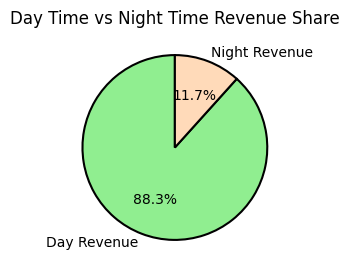

In [126]:
# Filter for night hours (11 PM to 5 AM)

# STUDENT COMMENT - Creating 2 DFs, one for trips during day hours & one for trips during night hours
night_hours_trips_df = operational_efficiency_df[(operational_efficiency_df["tpep_pickup_datetime"].dt.time >= pd.to_datetime("23:00").time()) |
                                            (operational_efficiency_df["tpep_pickup_datetime"].dt.time < pd.to_datetime("05:00").time())]
day_hours_trips_df = operational_efficiency_df[(operational_efficiency_df["tpep_pickup_datetime"].dt.time >= pd.to_datetime("05:00").time()) &
                                            (operational_efficiency_df["tpep_pickup_datetime"].dt.time < pd.to_datetime("23:00").time())]

# STUDENT COMMENT - Calculating day hours revenue & night hours revenue
night_revenue = night_hours_trips_df["total_amount"].sum()
day_revenue = day_hours_trips_df["total_amount"].sum()

# STUDENT COMMENT - Calculating total revenue, inorder to find the revenue share of day hours & night hours
total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# STUDENT COMMENT - Plotting pie chart so we can see proportions easily
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(
    [day_share, night_share], 
    labels=["Day Revenue", "Night Revenue"], 
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightgreen", "peachpuff"],
    wedgeprops={"edgecolor": "black", "linewidth": 1.5}
)
ax.set_aspect("equal")
plt.title("Day Time vs Night Time Revenue Share")

plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

<function matplotlib.pyplot.show(close=None, block=None)>

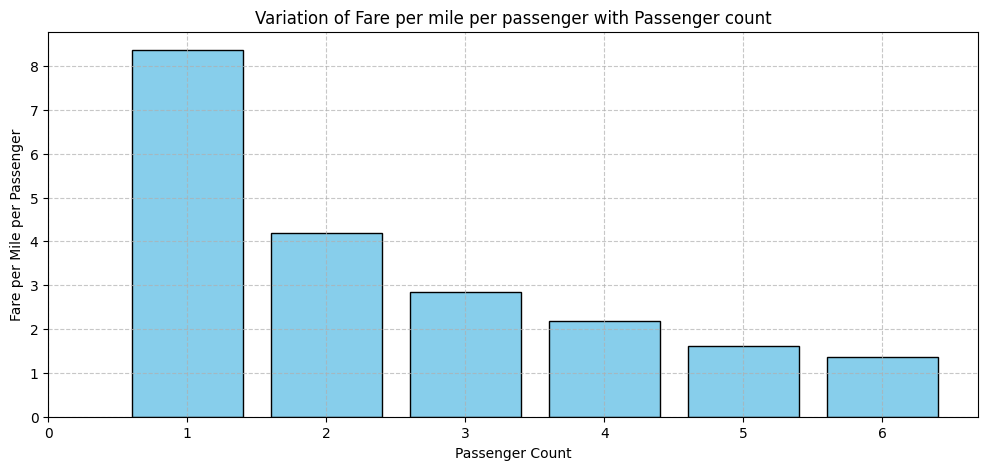

In [127]:
# Analyse the fare per mile per passenger for different passenger counts

# STUDENT COMMENT - Created new DF "pricing_strategy_df" using "operational_efficiency_df"
#                   We are filtering out rows with "trip_distance" 0 because we have to calculate fare per mile
#                   If we have "trip_distance" as 0 then fare per mile will be "infinity"
pricing_strategy_df = operational_efficiency_df[operational_efficiency_df["trip_distance"] > 0].copy()

# STUDENT COMMENT - Calcaulating "fare_per_mile" & adding it as a new column to "pricing_strategy_df"
#                   We are using "fare_amount" & not "total amount", for our calculations, as total_amount has multiple different chagres
pricing_strategy_df["fare_per_mile"] = pricing_strategy_df["fare_amount"] / pricing_strategy_df["trip_distance"]

# STUDENT COMMENT - Calculating fare per mile for different passenger counts
fare_per_mile_by_passenger_count = (pricing_strategy_df.groupby("passenger_count")["fare_per_mile"]
                                    .mean().reset_index(name="avg_fare_per_mile"))

# STUDENT COMMENT - Calculating fare_per_mile_per_passenger by dividing "avg_fare_per_mile" by "passenger_count" as stated in cell 3.2.9 above
fare_per_mile_by_passenger_count["fare_per_mile_per_passenger"] = (fare_per_mile_by_passenger_count["avg_fare_per_mile"] / 
                                                                   fare_per_mile_by_passenger_count["passenger_count"])
# STUDENT COMMENT - Plotting bar chart to visualize fare per mile per passenger for different passenger counts
plt.figure(figsize=(12,5))
plt.bar(fare_per_mile_by_passenger_count["passenger_count"], fare_per_mile_by_passenger_count["fare_per_mile_per_passenger"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(7))
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile per Passenger")
plt.title("Variation of Fare per mile per passenger with Passenger count")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<function matplotlib.pyplot.show(close=None, block=None)>

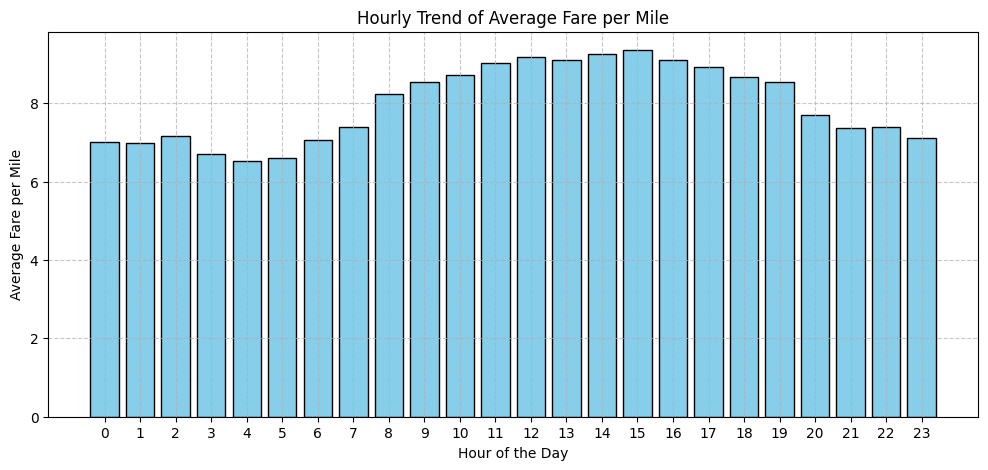

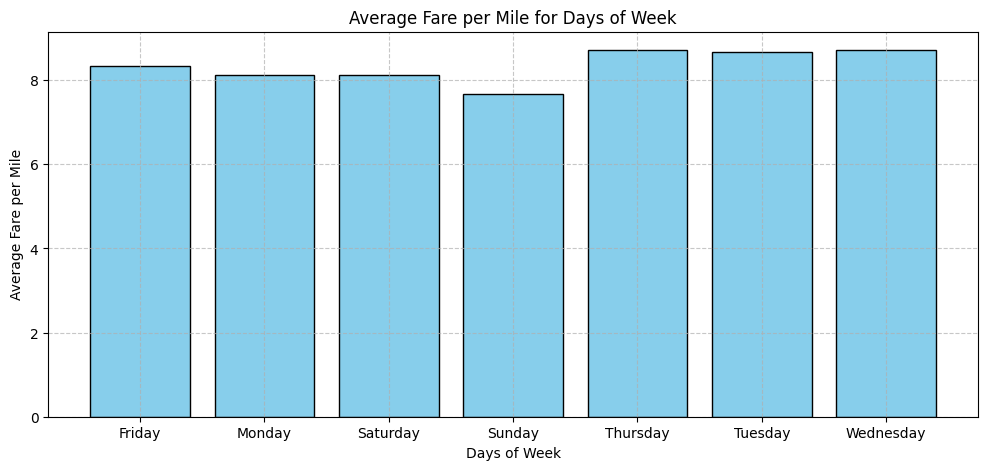

In [128]:
# Compare the average fare per mile for different days and for different times of the day

# STUDENT COMMENT - Calculating average fare per mile for every hour
hourly_avg_fare_per_mile = (pricing_strategy_df.groupby(by="pickup_hour")["fare_per_mile"]
                                             .mean().reset_index(name="hourly_avg_fare_per_mile"))
# STUDENT COMMENT - Plotting bar chart to visualize the data for hours of the day
plt.figure(figsize=(12,5))
plt.bar(hourly_avg_fare_per_mile["pickup_hour"], hourly_avg_fare_per_mile["hourly_avg_fare_per_mile"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile")
plt.title("Hourly Trend of Average Fare per Mile")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show

# STUDENT COMMENT - Calculating average fare per mile for every day of week
avg_fare_per_mile_by_day_of_week = (pricing_strategy_df.groupby(by="pickup_day_name")["fare_per_mile"]
                                             .mean().reset_index(name="avg_fare_per_mile_by_day_of_week"))
# STUDENT COMMENT - Plotting bar chart to visualize the data for days of week
plt.figure(figsize=(12,5))
plt.bar(avg_fare_per_mile_by_day_of_week["pickup_day_name"], avg_fare_per_mile_by_day_of_week["avg_fare_per_mile_by_day_of_week"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(7))
plt.xlabel("Days of Week")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile for Days of Week")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

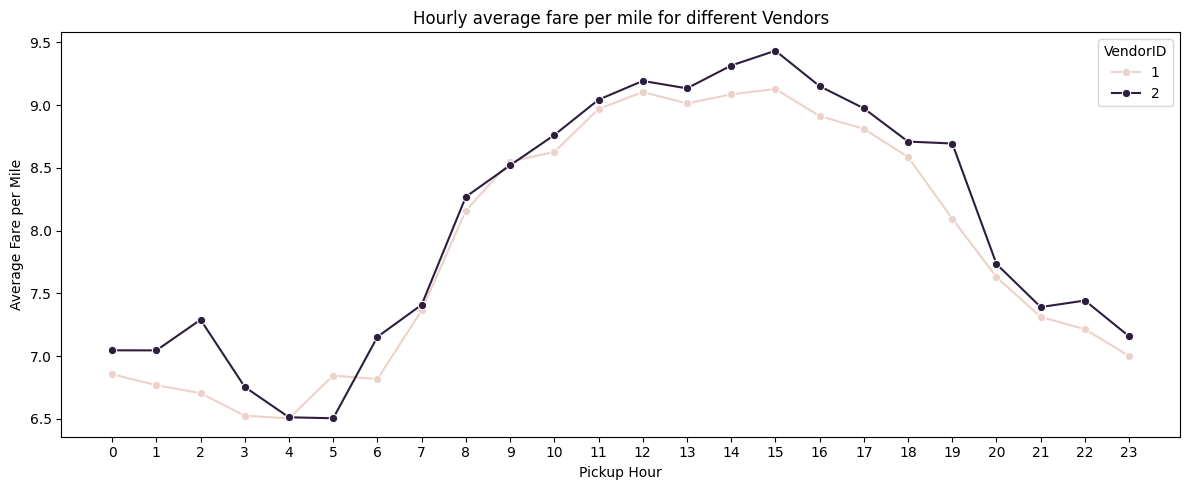

In [129]:
# Compare fare per mile for different vendors

# STUDENT COMMENT - Calculating average fare per mile for different hours of the day for every vendor
hourly_avg_fare_per_mile_by_vendor = (pricing_strategy_df.groupby(by=["VendorID", "pickup_hour"])["fare_per_mile"]
                                             .mean().reset_index(name="avg_fare_per_mile_by_vendor_and_hour"))

# STUDENT COMMENT - Comparing hourly fare per mile for different vendors using line plot
#                   We can use grouped bar chart as well, but the chart will be too big
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_avg_fare_per_mile_by_vendor, x="pickup_hour", y="avg_fare_per_mile_by_vendor_and_hour", 
             hue="VendorID", marker="o")

plt.title("Hourly average fare per mile for different Vendors")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare per Mile")
plt.xticks(range(0, 24))
plt.tight_layout()

plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


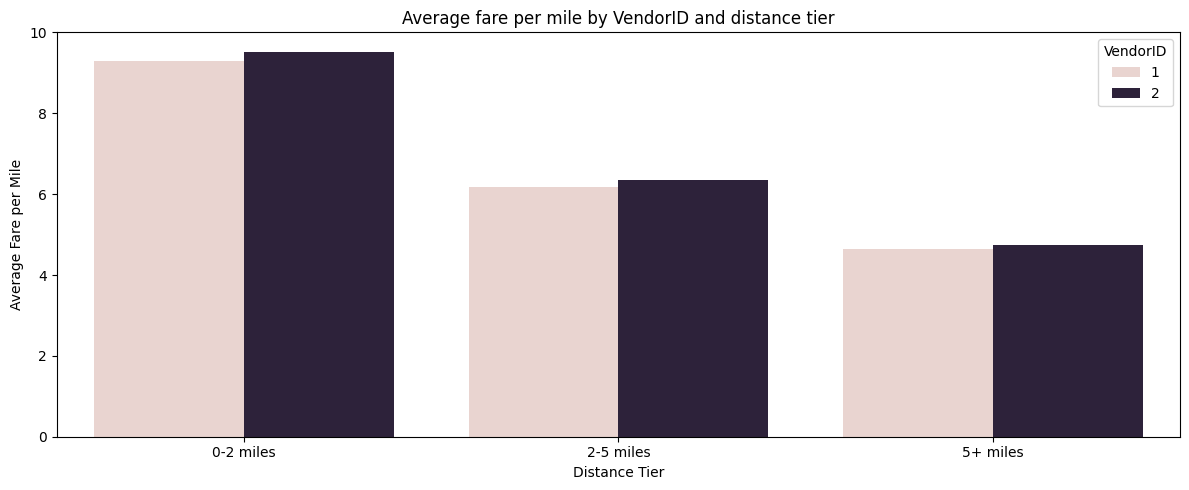

In [130]:
# Defining distance tiers

# STUDENT COMMENT - Adding "distance_tier" column for classifying "trip_distance" in different tiers
pricing_strategy_df["distance_tier"] = pricing_strategy_df["trip_distance"].apply(
                                         lambda x: "0-2 miles" if x <= 2 else ("2-5 miles" if x <= 5 else "5+ miles"))

# STUDENT COMMENT - Calculating average fare per mile for all distance tiers for different Vendors
avg_fare_per_mile_by_vendor_and_distance = (pricing_strategy_df.groupby(by=["VendorID", "distance_tier"])["fare_per_mile"]
                                             .mean().reset_index(name="avg_fare_per_mile_by_vendor_and_distance"))

# STUDENT COMMENT - Creating grouped bar char to do comparison across vendors
plt.figure(figsize=(12, 5))
sns.barplot(data=avg_fare_per_mile_by_vendor_and_distance,
            x="distance_tier",
            y="avg_fare_per_mile_by_vendor_and_distance",
            hue="VendorID")

plt.title("Average fare per mile by VendorID and distance tier")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile")
plt.tight_layout()

plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

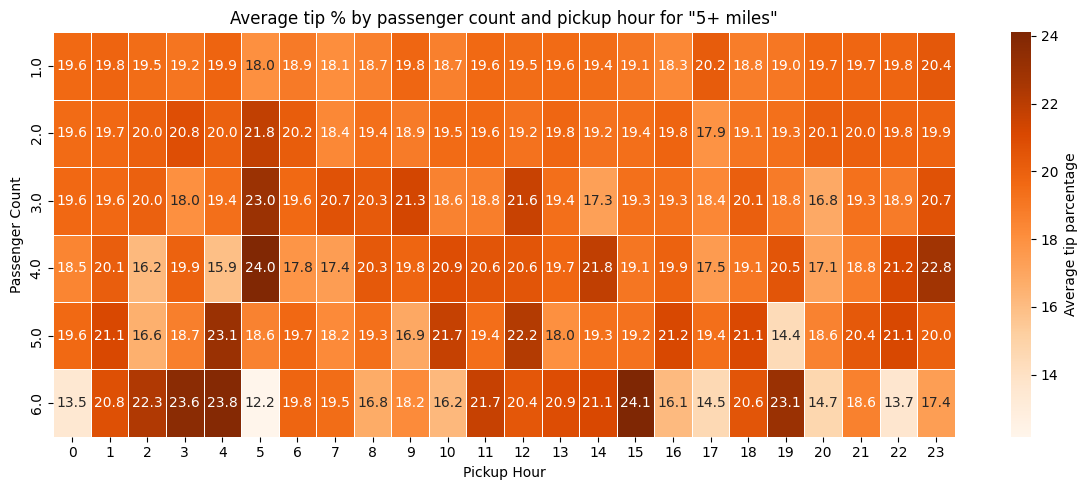

In [131]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# STUDENT COMMENT - Adding a new column "tip_Percent" to "pricing_strategy_df"
pricing_strategy_df["tip_percent"] = (pricing_strategy_df["tip_amount"] / pricing_strategy_df["fare_amount"]) * 100

# STUDENT COMMENT - Calculating average tip percentage for every "distance_tier", "passenger_count" & "pickup_hour"
#        **NOTE** - We are using "distance_tier" instead of "trip_distance" because there can be lots & lots of different trip distances
avg_tip_percent_df = (pricing_strategy_df.groupby(by=["distance_tier", "passenger_count", "pickup_hour"])["tip_percent"]
                                                       .mean().reset_index(name="avg_tip_percent"))

# STUDENT COMMENT - Creatinf new DF for heatmap as we have to analyze 3 variables
heatmap_df_short_tier = (avg_tip_percent_df[avg_tip_percent_df["distance_tier"] == "0-2 miles"]
              .pivot(index="passenger_count", columns="pickup_hour", values="avg_tip_percent").fillna(0))
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_df_short_tier, cmap="Oranges", linewidths=0.5, annot=True, fmt=".1f", cbar_kws={'label': 'Average tip parcentage'})
plt.title("Average tip % by passenger count and pickup hour for \"0-2 miles\"")
plt.xlabel("Pickup Hour")
plt.ylabel("Passenger Count")
plt.tight_layout()

plt.show()

# STUDENT COMMENT - Creatinf new DF for heatmap as we have to analyze 3 variables
heatmap_df_mid_tier = (avg_tip_percent_df[avg_tip_percent_df["distance_tier"] == "2-5 miles"]
              .pivot(index="passenger_count", columns="pickup_hour", values="avg_tip_percent").fillna(0))
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_df_mid_tier, cmap="Oranges", linewidths=0.5, annot=True, fmt=".1f", cbar_kws={'label': 'Average tip parcentage'})
plt.title("Average tip % by passenger count and pickup hour for \"2-5 miles\"")
plt.xlabel("Pickup Hour")
plt.ylabel("Passenger Count")
plt.tight_layout()

plt.show()

# STUDENT COMMENT - Creatinf new DF for heatmap as we have to analyze 3 variables
heatmap_df_long_tier = (avg_tip_percent_df[avg_tip_percent_df["distance_tier"] == "5+ miles"]
              .pivot(index="passenger_count", columns="pickup_hour", values="avg_tip_percent").fillna(0))
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_df_long_tier, cmap="Oranges", linewidths=0.5, annot=True, fmt=".1f", cbar_kws={'label': 'Average tip parcentage'})
plt.title("Average tip % by passenger count and pickup hour for \"5+ miles\"")
plt.xlabel("Pickup Hour")
plt.ylabel("Passenger Count")
plt.tight_layout()

plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [132]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

avg_tip_percent_df.sort_values(by="avg_tip_percent", inplace=True)
print("\n10 records with tip < 10%")
print(avg_tip_percent_df.head(10))

print("\n10 records with tip > 25%")
print(avg_tip_percent_df.tail(10))


10 records with tip < 10%
    distance_tier  passenger_count  pickup_hour  avg_tip_percent
413      5+ miles              6.0            5        12.165861
408      5+ miles              6.0            0        13.505705
430      5+ miles              6.0           22        13.657532
403      5+ miles              5.0           19        14.448276
425      5+ miles              6.0           17        14.549424
428      5+ miles              6.0           20        14.718330
364      5+ miles              4.0            4        15.922169
424      5+ miles              6.0           16        16.109097
362      5+ miles              4.0            2        16.162872
418      5+ miles              6.0           10        16.214966

10 records with tip > 25%
    distance_tier  passenger_count  pickup_hour  avg_tip_percent
99      0-2 miles              5.0            3        31.389450
125     0-2 miles              6.0            5        31.438524
139     0-2 miles              6.0  

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [133]:
# See how passenger count varies across hours and days

# STUDENT COMMENT - Calculating trip count for different passenger counts for all hours of the day
passenger_count_across_hours = (pricing_strategy_df.groupby(by=["passenger_count", "pickup_hour"])["trip_duration"]
                                .count().reset_index(name="count"))

# STUDENT COMMENT - Creating new DF which can be used to plot a heatmap, as we have 3 variables we need heatmap
heatmap_hour_df = passenger_count_across_hours.pivot(index="passenger_count", columns="pickup_hour", values="count").fillna(0)
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_hour_df, cmap="Oranges", linewidths=0.5, cbar_kws={'label': 'Number of Trips'})
plt.title("Total Trips by Passenger Count and Hours")
plt.xlabel("Pickup Hour")
plt.ylabel("Passenger Count")
plt.tight_layout()

plt.show()

# STUDENT COMMENT - Calculating trip count for different passenger counts for all days of week
passenger_count_across_days = (pricing_strategy_df.groupby(by=["passenger_count", "pickup_day_name"])["trip_duration"]
                               .count().reset_index(name="count"))

# STUDENT COMMENT - Creating new DF which can be used to plot a heatmap, as we have 3 variables we need heatmap
heatmap_day_df = passenger_count_across_days.pivot(index="passenger_count", columns="pickup_day_name", values="count").fillna(0)
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_day_df, cmap="Oranges", linewidths=0.5, cbar_kws={'label': 'Number of Trips'})
plt.title("Total Trips by Passenger count and Days of Week")
plt.xlabel("Day of Week")
plt.ylabel("Passenger Count")
plt.tight_layout()

plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [134]:
# How does passenger count vary across zones

# STUDENT COMMENT - Calculating trip count for different passenger counts for all Pickup Locations
passenger_count_across_zones = (pricing_strategy_df.groupby(by=["passenger_count", "PULocationID"])["trip_duration"]
                               .count().reset_index(name="passenger_count_across_zones"))
print("\nPassenger count variation across different Pickup Locations")
print(passenger_count_across_zones)

# STUDENT COMMENT - We are not plotting this as the number of unique zones is huge.
#                   If we want to plot & get usable info, then dimensions of heatmap will be very big


Passenger count variation across different Pickup Locations
     passenger_count  PULocationID  passenger_count_across_zones
0                1.0             1                             6
1                1.0             4                           946
2                1.0             7                           161
3                1.0             9                             1
4                1.0            10                             4
..               ...           ...                           ...
670              6.0           260                             1
671              6.0           261                            51
672              6.0           262                           174
673              6.0           263                           216
674              6.0           264                            60

[675 rows x 3 columns]


In [135]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# STUDENT COMMENT - We merged the "zones" GeoDataFrame into "finance_df"
#                   Then at a later point created "operational_efficiency_df" which is a copy of "finance_df"
#                   Then at a later point created "pricing_strategy_df" which is a copy of "operational_efficiency_df"
#                   So essentially, "pricing_strategy_df" is a copy of "finance_df"
#                   "pricing_strategy_df" has all the data of "finance_df" along with some more additional columns

# STUDENT COMMENT - Calculating average passenger count for all zones
avg_passenger_count_across_zones = (pricing_strategy_df.groupby(by=["PULocationID"])["passenger_count"]
                                    .mean().round().reset_index(name="avg_passenger_count_across_zones"))
pricing_strategy_df = (pricing_strategy_df.merge(avg_passenger_count_across_zones, on="PULocationID", how="left"))

result_df = (pricing_strategy_df.groupby(by=["PULocationID", "zone"])
             [["PULocationID", "zone", "avg_passenger_count_across_zones"]].first().reset_index(drop=True))
print("\nAverage passenger count across different Pickup Locations")
print(result_df.head(20))


Average passenger count across different Pickup Locations
    PULocationID                     zone  avg_passenger_count_across_zones
0              1           Newark Airport                               1.0
1              4            Alphabet City                               1.0
2              7                  Astoria                               1.0
3              9               Auburndale                               1.0
4             10             Baisley Park                               1.0
5             11               Bath Beach                               1.0
6             12             Battery Park                               2.0
7             13        Battery Park City                               1.0
8             14                Bay Ridge                               1.0
9             17                  Bedford                               2.0
10            18             Bedford Park                               1.0
11            24             

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

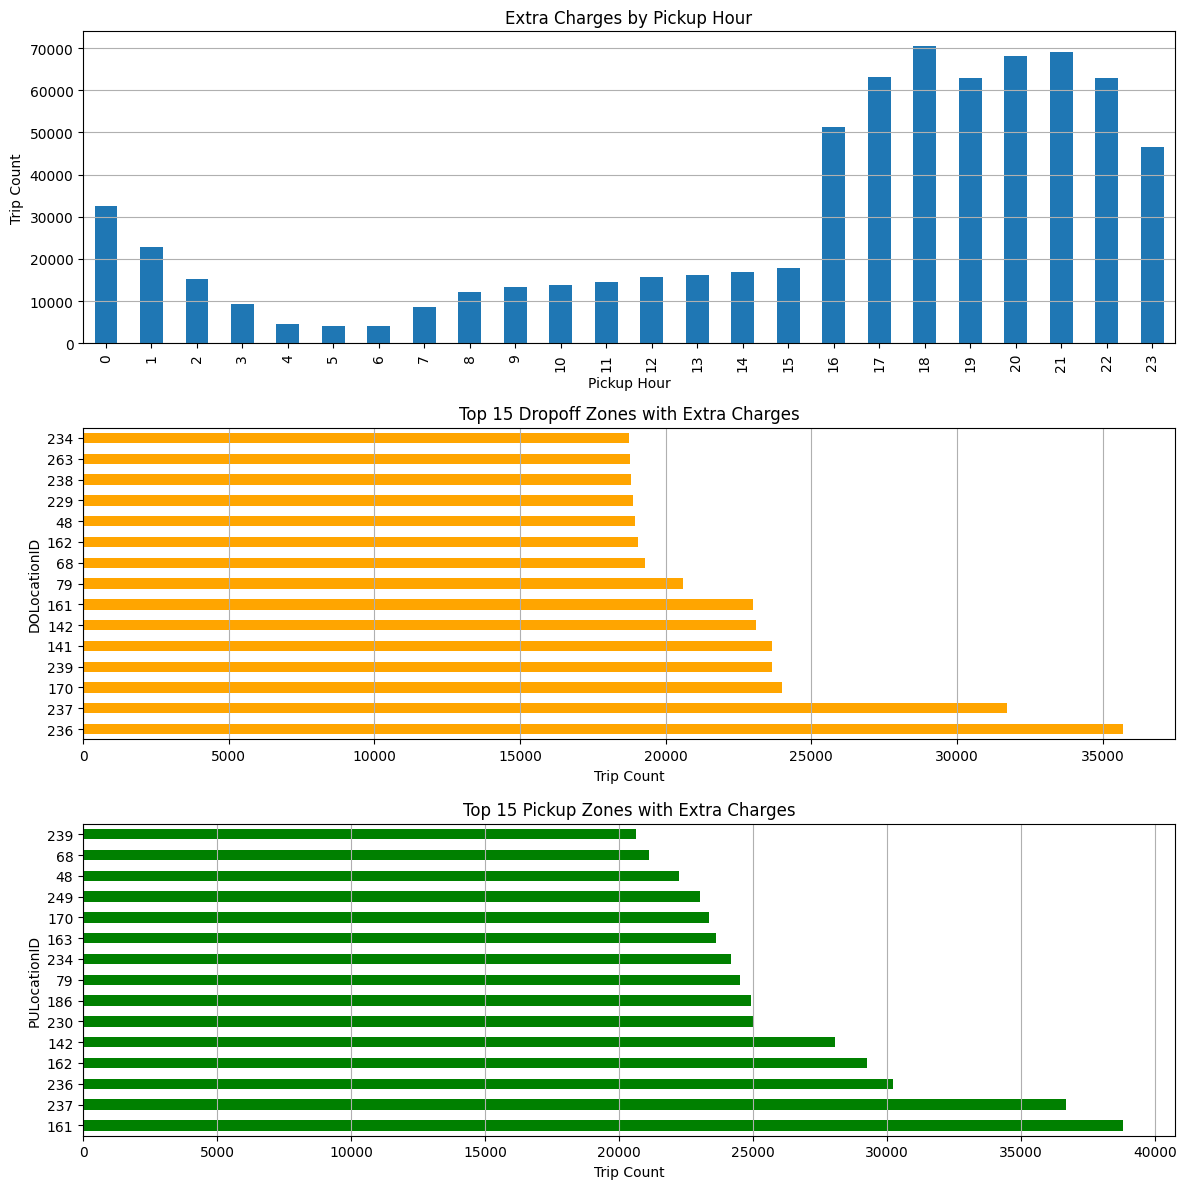

In [136]:
# How often is each surcharge applied?

# STUDENT COMMENT - Section 3.2.16 asks to analyze the column "extra" across pickup/dropoff zones & hours as well
#                   But the first comment in this cell asks to analyze each surcharge.
#                   So, going with Description of section 3.2.16, we're analyzing "extra" column

# STUDENT COMMENT - Creating new df having only those rows where the extra charges are applied i.e. extra > 0
extra_df = pricing_strategy_df[pricing_strategy_df["extra"] > 0].copy()
extra_df["PULocationID"] = extra_df["PULocationID"].astype(str)
extra_df["DOLocationID"] = extra_df["DOLocationID"].astype(str)

# STUDENT COMMENT - We are using the concept of sub-plotting to plot 3 different plots
#                   Using "barh" as some of the fields were getting overlapped
plt.figure(figsize=(12, 12))

# STUDENT COMMENT - Extra Charges by Pickup Hour
plt.subplot(3, 1, 1)
extra_df["pickup_hour"].value_counts().sort_index().plot(kind="bar")
plt.title("Extra Charges by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Trip Count")
plt.grid(axis="y")

# STUDENT COMMENT - Top 15 Dropoff Zones with Extra Charges, using different bar color for clear distinction
plt.subplot(3, 1, 2)
extra_df["DOLocationID"].value_counts().head(15).plot(kind="barh", color="orange")
plt.title("Top 15 Dropoff Zones with Extra Charges")
plt.xlabel("Trip Count")
plt.ylabel("DOLocationID")
plt.grid(axis="x")

# STUDENT COMMENT - Top 15 Pickup Zones with Extra Charges, using different bar color for clear distinction
plt.subplot(3, 1, 3)
extra_df["PULocationID"].value_counts().head(15).plot(kind="barh", color="green")
plt.title("Top 15 Pickup Zones with Extra Charges")
plt.xlabel("Trip Count")
plt.ylabel("PULocationID")
plt.grid(axis="x")

plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [3]:
# STUDENT COMMENT - Recommendations provided in report pdf

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [4]:
# STUDENT COMMENT - Suggestions provided in report pdf

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [5]:
# STUDENT COMMENT - Adjustment suggestions provided in report pdf